# Лабораторная 1
Выполнила: Сидельикова Дарья
___

**Цель работы**

Разработать модели машинного обучения для прогнозирования стоимости квартир на основе их характеристик, включая полный цикл предобработки данных, оценки влияния различных факторов на цену недвижимости.


**Задачи лаборвторной**
___
1.1. Провести анализ качества данных и выявить проблемы

1.2. Выявить и скорректировать аномальные значения и выбросы

1.3. Выполнить обработку пропущенных значений с обоснованием методов

1.4. Обнаружить и обработать дубликаты записей

1.5. Проверить соответствие типов данных и при необходимости преобразовать их

1.6. Закодировать категориальные признаки для использования в ML-моделях

1.7. Провести скалирование и нормализацию числовых признаков
___
2.1. Создать новые производные признаки на основе доменных знаний о недвижимости

2.2. Обосновать выбор созданных признаков с точки зрения их прогностической силы
___
3.1 Провести комплексную оценку влияния характеристик на стоимость квартир

3.2 Отобрать наиболее значимые признаки для построения моделей
___
4.1. Выделить сегменты квартир с различной структурой ценообразования

4.2. Обосновать свой выбор
___
5.1. Разделить данные на обучающую и тестовую выборки

5.2. Обучить несколько алгоритмов машинного обучения для прогнозирования:
- Линейная регрессия
- Ридж- и Лассо-регрессия
- Случайный лес
- Градиентный бустинг
- Метод опорных векторов

5.3. Провести сравнительный анализ эффективности моделей

5.4. Выбрать оптимальную модель на основе метрик качества

5.5. Проинтерпретировать результаты и важность признаков
___
6.1. Сформулировать выводы о ключевых факторах, влияющих на стоимость недвижимости

6.2. Определить практическую значимость полученных результатов

6.3. Предложить рекомендации для дальнейшего улучшения модели


# Этап 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, f_regression
from scipy.stats import pearsonr


In [ ]:
df = pd.read_csv("data_lab_1.csv")
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.70,16.0,51.0,8,False,25.00,NaN,18863.0,16028.0,482.0,755.0
1,3350000.0,40.40,1,NaN,11.0,18.6,1,False,11.00,2.0,12817.0,18603.0,NaN,NaN
2,5196000.0,56.00,2,NaN,5.0,34.3,4,False,8.30,0.0,21741.0,13933.0,90.0,574.0
3,64900000.0,159.00,3,NaN,14.0,NaN,9,False,NaN,0.0,28098.0,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.03,14.0,32.0,13,False,41.00,NaN,31856.0,8098.0,112.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.70,5.0,73.3,3,False,13.83,NaN,24665.0,4232.0,796.0,381.0
23695,3100000.0,59.00,3,NaN,5.0,38.0,4,False,8.50,NaN,NaN,NaN,NaN,NaN
23696,2500000.0,56.70,2,NaN,3.0,29.7,1,False,NaN,NaN,NaN,NaN,NaN,NaN
23697,11475000.0,76.75,2,3.00,17.0,NaN,12,False,23.30,2.0,39140.0,10364.0,173.0,196.0


### 1.1. Провести анализ качества данных и выявить проблемы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              23699 non-null  float64
 1   total_area         23699 non-null  float64
 2   rooms              23699 non-null  int64  
 3   ceiling_height     14504 non-null  float64
 4   floors_total       23613 non-null  float64
 5   living_area        21796 non-null  float64
 6   floor              23699 non-null  int64  
 7   studio             23699 non-null  bool   
 8   kitchen_area       21421 non-null  float64
 9   balcony            12180 non-null  float64
 10  airports_distance  18157 non-null  float64
 11  centers_distance   18180 non-null  float64
 12  parks_nearest      8079 non-null   float64
 13  ponds_nearest      9110 non-null   float64
dtypes: bool(1), float64(11), int64(2)
memory usage: 2.4 MB


Пропуски:

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

price - 0%
total_area - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
studio - 0%
kitchen_area - 10%
balcony - 49%
airports_distance - 23%
centers_distance - 23%
parks_nearest - 66%
ponds_nearest - 62%


Описательная статистика:

In [ ]:
df.describe( include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,23699.0,NaN,NaN,NaN,6541548.771552,10887013.267545,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,NaN,NaN,NaN,60.348651,35.654083,12.0,40.0,52.0,69.9,900.0
rooms,23699.0,NaN,NaN,NaN,2.070636,1.078405,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,NaN,NaN,NaN,2.771499,1.261056,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,NaN,NaN,NaN,10.673824,6.597173,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,NaN,NaN,NaN,34.457852,22.030445,2.0,18.6,30.0,42.3,409.7
floor,23699.0,NaN,NaN,NaN,5.892358,4.885249,1.0,2.0,4.0,8.0,33.0
studio,23699,2,False,23550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,21421.0,NaN,NaN,NaN,10.569807,5.905438,1.3,7.0,9.1,12.0,112.0
balcony,12180.0,NaN,NaN,NaN,1.150082,1.0713,0.0,0.0,1.0,2.0,5.0


После проведения краткого анализа данных, я заметила очень много пропусков, особенно в столбцах balcony, centers_distance, parks_nearest, ponds_nearest. Также выбрасы: восота потолков 100 метров и тп.



---
### 1.2. Выявить и скорректировать аномальные значения и выбросы


Излишне большие или маленькие данные заменила на медиану, так как, когда пробовала заменить на пограничное приемлемое значение, среднее прилично смещалось. Замена на медиану сильных изменений не дала

In [ ]:
df['price'] = df['price'].where(df['price'] >= 1300000, df['price'].mean())
df['total_area'] = df['total_area'].where(df['total_area'] >= 28, df['total_area'].mean())
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] >= 2.5, df['ceiling_height'].mean())
df['ceiling_height'] = df['ceiling_height'].where(df['ceiling_height'] <= 6, df['ceiling_height'].mean())
df['floors_total'] = df['floors_total'].where(df['floors_total'] <= 37, df['floors_total'].mean())
df['living_area'] = df['living_area'].where(df['living_area'] >= 20, df['living_area'].mean())
df['kitchen_area'] = df['kitchen_area'].where(df['kitchen_area'] >= 5, df['kitchen_area'].mean())
df['balcony'] = df['balcony'].where(df['balcony'] <= 3, df['balcony'].mean())
df['airports_distance'] = df['airports_distance'].where(df['airports_distance'] >= 4000, df['airports_distance'].mean())
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000.0,108.00,3,2.700000,16.0,51.000000,8,False,25.000000,1.150082,18863.000000,16028.0,482.0,755.0
1,3350000.0,40.40,1,2.771499,11.0,34.457852,1,False,11.000000,2.000000,12817.000000,18603.0,NaN,NaN
2,5196000.0,56.00,2,2.771499,5.0,34.300000,4,False,8.300000,0.000000,21741.000000,13933.0,90.0,574.0
3,64900000.0,159.00,3,2.771499,14.0,34.457852,9,False,10.569807,0.000000,28098.000000,6800.0,84.0,234.0
4,10000000.0,100.00,2,3.030000,14.0,32.000000,13,False,41.000000,1.150082,31856.000000,8098.0,112.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,3,3.700000,5.0,73.300000,3,False,13.830000,1.150082,24665.000000,4232.0,796.0,381.0
23695,3100000.0,59.00,3,2.771499,5.0,38.000000,4,False,8.500000,1.150082,28793.672193,NaN,NaN,NaN
23696,2500000.0,56.70,2,2.771499,3.0,29.700000,1,False,10.569807,1.150082,28793.672193,NaN,NaN,NaN
23697,11475000.0,76.75,2,3.000000,17.0,34.457852,12,False,23.300000,2.000000,39140.000000,10364.0,173.0,196.0


In [ ]:
df.describe( include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,23699.0,NaN,NaN,NaN,6646489.88655,10859491.898709,1300000.0,3500000.0,4750000.0,6800000.0,763000000.0
total_area,23699.0,NaN,NaN,NaN,60.946845,35.342422,28.0,41.0,53.0,69.9,900.0
rooms,23699.0,NaN,NaN,NaN,2.070636,1.078405,0.0,1.0,2.0,3.0,19.0
ceiling_height,23699.0,NaN,NaN,NaN,2.745442,0.217661,2.5,2.6,2.771499,2.771499,6.0
floors_total,23699.0,NaN,NaN,NaN,10.669999,6.57191,1.0,5.0,9.0,16.0,37.0
living_area,23699.0,NaN,NaN,NaN,39.102647,18.489348,20.0,31.8,34.457852,41.1,409.7
floor,23699.0,NaN,NaN,NaN,5.892358,4.885249,1.0,2.0,4.0,8.0,33.0
studio,23699,2,False,23550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen_area,23699.0,NaN,NaN,NaN,10.598932,5.596996,5.0,7.5,10.0,11.44,112.0
balcony,23699.0,NaN,NaN,NaN,1.07869,0.576083,0.0,1.0,1.150082,1.150082,3.0


### 1.3. Выполнить обработку пропущенных значений с обоснованием методов


Так как после замены выбросов значения Nan тоже были измененны на медиану, оставшиеся значения также заменяю на медиану

In [ ]:
for col in df.columns:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

price - 0%
total_area - 0%
rooms - 0%
ceiling_height - 0%
floors_total - 0%
living_area - 0%
floor - 0%
studio - 0%
kitchen_area - 0%
balcony - 0%
airports_distance - 0%
centers_distance - 23%
parks_nearest - 66%
ponds_nearest - 62%


In [ ]:
df['centers_distance'] = df['centers_distance'].fillna(df['centers_distance'].median())
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())
df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())

In [ ]:
for col in ['centers_distance', 'parks_nearest', 'ponds_nearest']:
    missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing*100)))

centers_distance - 0%
parks_nearest - 0%
ponds_nearest - 0%


### 1.4. Обнаружить и обработать дубликаты записей


Дубликаты квартир удаляю

In [ ]:
df.duplicated().sum()

np.int64(6)

In [ ]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
809,1.750000e+06,44.000000,1,2.771499,5.0,34.457852,1,False,14.000000,0.000000,28793.672193,13098.5,455.0,502.0
2395,1.750000e+06,44.000000,1,2.771499,5.0,34.457852,1,False,14.000000,0.000000,28793.672193,13098.5,455.0,502.0
5499,6.541549e+06,31.000000,1,2.500000,5.0,34.457852,1,False,10.569807,1.150082,28793.672193,13098.5,455.0,502.0
9303,6.541549e+06,31.000000,1,2.771499,5.0,34.457852,4,False,10.569807,1.150082,28793.672193,13098.5,455.0,502.0
9661,2.533531e+06,42.500000,1,2.560000,18.0,34.457852,7,False,10.569807,1.150082,28793.672193,13098.5,455.0,502.0
9886,2.533531e+06,42.500000,1,2.560000,18.0,34.457852,7,False,10.569807,1.150082,28793.672193,13098.5,455.0,502.0
10945,6.541549e+06,31.000000,1,2.771499,5.0,34.457852,4,False,10.569807,1.150082,28793.672193,13098.5,455.0,502.0
10964,6.541549e+06,60.348651,1,2.771499,3.0,34.457852,1,False,10.569807,0.000000,28793.672193,13098.5,455.0,502.0
11460,6.541549e+06,31.000000,1,2.500000,5.0,34.457852,1,False,10.569807,1.150082,28793.672193,13098.5,455.0,502.0
12672,6.541549e+06,30.000000,1,2.500000,5.0,34.457852,1,False,6.000000,1.150082,28793.672193,13098.5,455.0,502.0


In [ ]:
df_cleaned = df.drop_duplicates()
df = df_cleaned

In [ ]:
df.duplicated().sum()

np.int64(0)

### 1.5. Проверить соответствие типов данных и при необходимости преобразовать их


In [ ]:
df.dtypes

,0
price,float64
total_area,float64
rooms,int64
ceiling_height,float64
floors_total,float64
living_area,float64
floor,int64
studio,bool
kitchen_area,float64
balcony,float64


In [ ]:
df_clean = df.copy()
df_clean['price'] = df_clean['price'].astype('int64')
df_clean['balcony'] = df_clean['balcony'].astype('int64')
df_clean['floors_total'] = df_clean['floors_total'].astype('int64')
df_clean['airports_distance'] = df_clean['airports_distance'].astype('int64')
df_clean['centers_distance'] = df_clean['centers_distance'].astype('int64')
df_clean['parks_nearest'] = df_clean['parks_nearest'].astype('int64')
df_clean['ponds_nearest'] = df_clean['ponds_nearest'].astype('int64')
df = df_clean
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000,108.00,3,2.700000,16,51.000000,8,False,25.000000,1,18863,16028,482,755
1,3350000,40.40,1,2.771499,11,34.457852,1,False,11.000000,2,12817,18603,455,502
2,5196000,56.00,2,2.771499,5,34.300000,4,False,8.300000,0,21741,13933,90,574
3,64900000,159.00,3,2.771499,14,34.457852,9,False,10.569807,0,28098,6800,84,234
4,10000000,100.00,2,3.030000,14,32.000000,13,False,41.000000,1,31856,8098,112,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,133.81,3,3.700000,5,73.300000,3,False,13.830000,1,24665,4232,796,381
23695,3100000,59.00,3,2.771499,5,38.000000,4,False,8.500000,1,28793,13098,455,502
23696,2500000,56.70,2,2.771499,3,29.700000,1,False,10.569807,1,28793,13098,455,502
23697,11475000,76.75,2,3.000000,17,34.457852,12,False,23.300000,2,39140,10364,173,196


In [ ]:
float_columns_to_round = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for col in float_columns_to_round:
    df[col] = df[col].round(2)
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000,108.00,3,2.70,16,51.00,8,False,25.00,1,18863,16028,482,755
1,3350000,40.40,1,2.77,11,34.46,1,False,11.00,2,12817,18603,455,502
2,5196000,56.00,2,2.77,5,34.30,4,False,8.30,0,21741,13933,90,574
3,64900000,159.00,3,2.77,14,34.46,9,False,10.57,0,28098,6800,84,234
4,10000000,100.00,2,3.03,14,32.00,13,False,41.00,1,31856,8098,112,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,133.81,3,3.70,5,73.30,3,False,13.83,1,24665,4232,796,381
23695,3100000,59.00,3,2.77,5,38.00,4,False,8.50,1,28793,13098,455,502
23696,2500000,56.70,2,2.77,3,29.70,1,False,10.57,1,28793,13098,455,502
23697,11475000,76.75,2,3.00,17,34.46,12,False,23.30,2,39140,10364,173,196


### 1.6. Закодировать категориальные признаки для использования в ML-моделях


In [ ]:
df_encoded = df.copy()
df_encoded['studio'] = df['studio'].astype(int)
df = df_encoded
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest
0,13000000,108.00,3,2.70,16,51.00,8,0,25.00,1,18863,16028,482,755
1,3350000,40.40,1,2.77,11,34.46,1,0,11.00,2,12817,18603,455,502
2,5196000,56.00,2,2.77,5,34.30,4,0,8.30,0,21741,13933,90,574
3,64900000,159.00,3,2.77,14,34.46,9,0,10.57,0,28098,6800,84,234
4,10000000,100.00,2,3.03,14,32.00,13,0,41.00,1,31856,8098,112,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,133.81,3,3.70,5,73.30,3,0,13.83,1,24665,4232,796,381
23695,3100000,59.00,3,2.77,5,38.00,4,0,8.50,1,28793,13098,455,502
23696,2500000,56.70,2,2.77,3,29.70,1,0,10.57,1,28793,13098,455,502
23697,11475000,76.75,2,3.00,17,34.46,12,0,23.30,2,39140,10364,173,196


# !!! Этап 2

### 2.1. Создать новые производные признаки на основе доменных знаний о недвижимости

### 2.2. Обосновать выбор созданных признаков с точки зрения их прогностической силы


В ходе выполнения работы, появилась идея сразу добавить новые признаки перед скалированием датафрейма


Я добавила 3 новые колонки:
  - 1: Цена за квадратный метр
    - Один из важнейших показателей при выборе квартиры, включает в себе и зависимость от местоположения, и этаж, и качество жк и планировки

  - 2: Отношение жилой площади к общей:
    - Вероятно не особо удачный признак для студий и маленьких квартир, однако тоже имеет место быть

  - 3: Сколько 52 помещается в квартиру
    - Так как мы смотрим квартиры именно по Питербургу, то обязательно нужно знать сколько 52 в нее поместится

In [ ]:
# 1: Цена за квадратный метр
df['price_per_sqm'] = (df['price'] / df['total_area']).round(2)

# 2: Отношение жилой площади к общей
df['living_area_ratio'] = (df['living_area'] / df['total_area']).round(2)

# 3: Сколько 52 помещается в квартиру
df['52_area'] = df['living_area'] // 52
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest,price_per_sqm,living_area_ratio,52_area
0,13000000,108.00,3,2.70,16,51.00,8,0,25.00,1,18863,16028,482,755,120370.37,0.47,0.0
1,3350000,40.40,1,2.77,11,34.46,1,0,11.00,2,12817,18603,455,502,82920.79,0.85,0.0
2,5196000,56.00,2,2.77,5,34.30,4,0,8.30,0,21741,13933,90,574,92785.71,0.61,0.0
3,64900000,159.00,3,2.77,14,34.46,9,0,10.57,0,28098,6800,84,234,408176.10,0.22,0.0
4,10000000,100.00,2,3.03,14,32.00,13,0,41.00,1,31856,8098,112,48,100000.00,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000,133.81,3,3.70,5,73.30,3,0,13.83,1,24665,4232,796,381,72490.85,0.55,1.0
23695,3100000,59.00,3,2.77,5,38.00,4,0,8.50,1,28793,13098,455,502,52542.37,0.64,0.0
23696,2500000,56.70,2,2.77,3,29.70,1,0,10.57,1,28793,13098,455,502,44091.71,0.52,0.0
23697,11475000,76.75,2,3.00,17,34.46,12,0,23.30,2,39140,10364,173,196,149511.40,0.45,0.0


In [ ]:
normal_df = df.copy()

### 1.7. Провести скалирование числовых признаков


price                : 1300000.00 - 763000000.00 (размах: 761700000.00)
total_area           :      28.00 -     900.00 (размах:     872.00)
rooms                :       0.00 -      19.00 (размах:      19.00)
ceiling_height       :       2.50 -       6.00 (размах:       3.50)
floors_total         :       1.00 -      37.00 (размах:      36.00)
living_area          :      20.00 -     409.70 (размах:     389.70)
floor                :       1.00 -      33.00 (размах:      32.00)
kitchen_area         :       5.00 -     112.00 (размах:     107.00)
airports_distance    :    6450.00 -   84869.00 (размах:   78419.00)
centers_distance     :     181.00 -   65968.00 (размах:   65787.00)
parks_nearest        :       1.00 -    3190.00 (размах:    3189.00)
ponds_nearest        :      13.00 -    1344.00 (размах:    1331.00)
price_per_sqm        :   10507.25 - 1907500.00 (размах: 1896992.75)


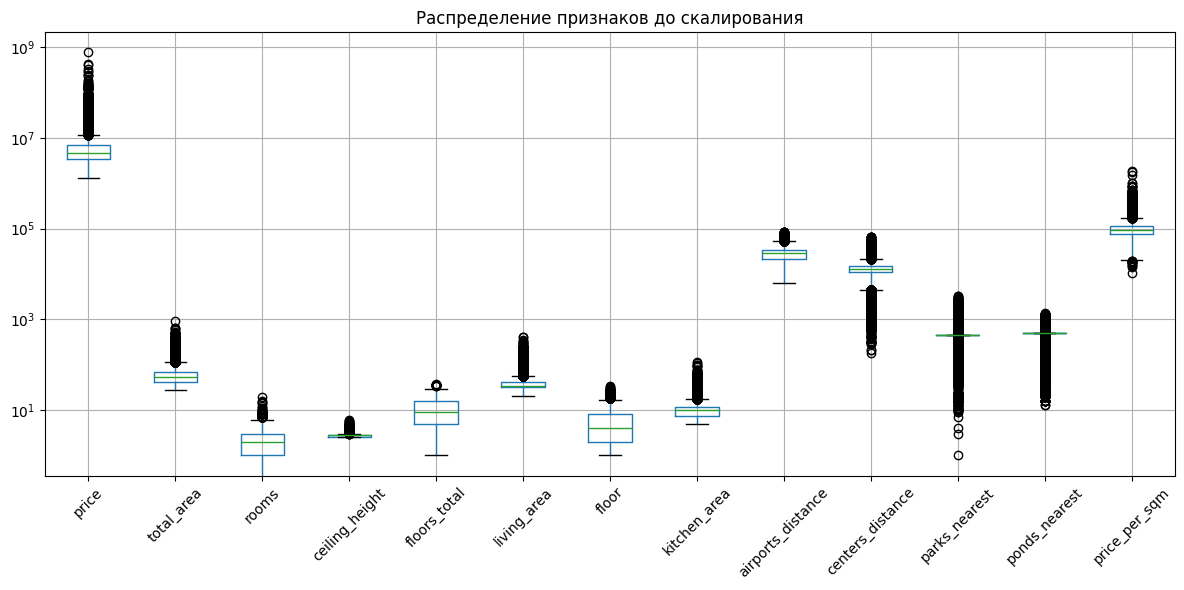

In [ ]:
numeric_columns = ['price', 'total_area', 'rooms', 'ceiling_height', 'floors_total',
                  'living_area', 'floor', 'kitchen_area', 'airports_distance',
                  'centers_distance', 'parks_nearest', 'ponds_nearest','price_per_sqm']

for col in numeric_columns:
    min_val = df[col].min()
    max_val = df[col].max()
    range_val = max_val - min_val
    print(f"{col:20} : {min_val:10.2f} - {max_val:10.2f} (размах: {range_val:10.2f})")

plt.figure(figsize=(12, 6))
df[numeric_columns].boxplot()
plt.xticks(rotation=45)
plt.title('Распределение признаков до скалирования')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = ['price', 'total_area',
                  'living_area', 'kitchen_area', 'airports_distance',
                  'centers_distance', 'parks_nearest', 'ponds_nearest','price_per_sqm']


scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df_scaled[numeric_columns].describe().loc[['mean', 'std', 'min', 'max']].round(2))
df = df_scaled
# df

      price  total_area  living_area  kitchen_area  airports_distance  \
mean   0.00       -0.00         0.00         -0.00              -0.00   
std    1.00        1.00         1.00          1.00               1.00   
min   -0.49       -0.93        -1.03         -1.00              -2.02   
max   69.64       23.74        20.04         18.12               5.07   

      centers_distance  parks_nearest  ponds_nearest  price_per_sqm  
mean              0.00           0.00           0.00          -0.00  
std               1.00           1.00           1.00           1.00  
min              -1.82          -2.32          -2.87          -1.79  
max               6.89          13.57           4.85          35.72  


In [ ]:
df

,price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,airports_distance,centers_distance,parks_nearest,ponds_nearest,price_per_sqm,living_area_ratio,52_area
0,0.584971,1.331134,3,2.70,16,0.643311,8,0,2.572771,1,-0.898366,0.276801,0.073734,1.432079,0.383584,0.47,0.0
1,-0.303565,-0.581489,1,2.77,11,-0.251180,1,0,0.071638,2,-1.445252,0.617653,-0.060862,-0.035647,-0.356975,0.85,0.0
2,-0.133592,-0.140114,2,2.77,5,-0.259833,4,0,-0.410723,0,-0.638039,-0.000515,-1.880400,0.382046,-0.161898,0.61,0.0
3,5.363731,2.774089,3,2.77,14,-0.251180,9,0,-0.005182,0,-0.063022,-0.944710,-1.910310,-1.590392,6.074895,0.22,0.0
4,0.308742,1.104788,2,3.03,14,-0.384218,13,0,5.431209,1,0.276905,-0.772894,-1.770729,-2.669431,-0.019236,0.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,0.281119,2.061383,3,3.70,5,1.849305,3,0,0.577224,1,-0.373551,-1.284637,1.639035,-0.737603,-0.563225,0.55,1.0
23695,-0.326584,-0.055235,3,2.77,5,-0.059735,4,0,-0.374993,1,-0.000157,-0.111044,-0.060862,-0.035647,-0.957703,0.64,0.0
23696,-0.381830,-0.120309,2,2.77,3,-0.508603,1,0,-0.005182,1,-0.000157,-0.111044,-0.060862,-0.035647,-1.124814,0.52,0.0
23697,0.444555,0.446970,2,3.00,17,-0.251180,12,0,2.269062,2,0.935773,-0.472944,-1.466642,-1.810841,0.959843,0.45,0.0


# Этап 3

3.1 Провести комплексную оценку влияния характеристик на стоимость квартир

3.2 Отобрать наиболее значимые признаки для построения моделей


Чтобы узнать какие признаки больше всего влияют на стоимость квартиры я воспользуюсь такими методами статистики, как: Корреляционный анализ(линейная зависимость) и Mutual Information(нелинейная), а также решил использовать Feature Importance от Random Forest для полноты анализа, тоже учитывает нелинейность


буду смотреть на влияние цены за метр



In [ ]:
target = 'price_per_sqm'
features = [col for col in df.columns if col not in ['price', 'price_per_sqm']]

## Корреляционный анализ:

In [ ]:
correlation_results = []
for feature in features:
    corr, p_value = pearsonr(df[feature].fillna(df[feature].mean()), df[target])
    correlation_results.append({
        'feature': feature,
        'correlation': abs(corr),
        'correlation_raw': corr,
        'p_value': p_value,
    })

correlation_results.sort(key=lambda x: x['correlation'], reverse=True)

print("Feature".ljust(25) + "Correlation".ljust(20))
for result in correlation_results[:15]:
    print(f"{result['feature'][:24].ljust(25)} {result['correlation']:.3f}".ljust(15))

Feature                  Correlation         
kitchen_area              0.335
total_area                0.275
ceiling_height            0.263
centers_distance          0.253
52_area                   0.238
living_area               0.232
floor                     0.085
floors_total              0.083
ponds_nearest             0.071
rooms                     0.056
studio                    0.053
living_area_ratio         0.049
airports_distance         0.027
parks_nearest             0.026
balcony                   0.026


Топ 3:
- площадь кухни
- вся площадь
- высота потолков


## Mutual Information

In [ ]:
X = df[features].fillna(df[features].mean())
y = df[target]

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_results = []

for i, feature in enumerate(features):
    mi_results.append({
        'feature': feature,
        'mi_score': mi_scores[i]
    })

mi_results.sort(key=lambda x: x['mi_score'], reverse=True)

print("Feature".ljust(25) + "MI Score")
for result in mi_results[:15]:
    print(f"{result['feature'][:24].ljust(25)} {result['mi_score']:.4f}")

Feature                  MI Score
total_area                0.6867
centers_distance          0.3562
airports_distance         0.3078
living_area_ratio         0.2625
kitchen_area              0.1274
floors_total              0.1236
rooms                     0.0894
ceiling_height            0.0877
living_area               0.0857
parks_nearest             0.0793
ponds_nearest             0.0788
floor                     0.0405
52_area                   0.0289
balcony                   0.0122
studio                    0.0066


Топ 3:
- вся площадь
- расстояние до центра
- расстояние до аэропорта

## Feature Importance от Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_rf = df[features].fillna(df[features].mean())
y_rf = df[target]

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_rf, y_rf)

feature_importance = rf.feature_importances_

rf_results = []
for i, feature in enumerate(features):
    rf_results.append({
        'feature': feature,
        'importance': feature_importance[i]
    })

rf_results.sort(key=lambda x: x['importance'], reverse=True)

print("Feature".ljust(25) + "RF Importance")
for result in rf_results[:15]:
    print(f"{result['feature'][:24].ljust(25)} {result['importance']:.4f}")

Feature                  RF Importance
centers_distance          0.3609
total_area                0.1189
kitchen_area              0.1145
airports_distance         0.0764
floors_total              0.0600
living_area               0.0408
living_area_ratio         0.0397
parks_nearest             0.0388
floor                     0.0364
ponds_nearest             0.0344
ceiling_height            0.0288
rooms                     0.0243
balcony                   0.0200
52_area                   0.0057
studio                    0.0003


топ 3:
- расстояние до центра
- вся площадь
- площадь кухни


я бы тоже выбирала квартиру ссылаясь на эти критерии
## Объединим результаты

In [ ]:
comparison_data = []

correlation_dict = {result['feature']: result for result in correlation_results}
mi_dict = {result['feature']: result for result in mi_results}
rf_dict = {result['feature']: result for result in rf_results}

for feature in features:
    comparison_data.append({
        'feature': feature,
        'correlation': correlation_dict[feature]['correlation_raw'],
        'correlation_abs': correlation_dict[feature]['correlation'],
        'mi_score': mi_dict[feature]['mi_score'],
        'rf_importance': rf_dict[feature]['importance']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('rf_importance', ascending=False)

comparison_df['correlation_norm'] = (comparison_df['correlation_abs'] - comparison_df['correlation_abs'].min()) / (comparison_df['correlation_abs'].max() - comparison_df['correlation_abs'].min())
comparison_df['mi_norm'] = (comparison_df['mi_score'] - comparison_df['mi_score'].min()) / (comparison_df['mi_score'].max() - comparison_df['mi_score'].min())
comparison_df['rf_norm'] = (comparison_df['rf_importance'] - comparison_df['rf_importance'].min()) / (comparison_df['rf_importance'].max() - comparison_df['rf_importance'].min())

comparison_df['combined_score'] = (
    comparison_df['correlation_norm'] * 0.3 +
    comparison_df['mi_norm'] * 0.3 +
    comparison_df['rf_norm'] * 0.4
)

comparison_df = comparison_df.sort_values('combined_score', ascending=False)

print(f"{'Feature':<25} {'Corr':<8} {'MI':<8} {'RF Imp':<8} {'Combined':<8}")
for _, row in comparison_df.head(15).iterrows():
    print(f"{row['feature'][:24]:<25} {row['correlation']:>7.3f} {row['mi_score']:>7.3f} {row['rf_importance']:>7.3f} {row['combined_score']:>7.3f}")

Feature                   Corr     MI       RF Imp   Combined
centers_distance           -0.253   0.356   0.361   0.775
total_area                  0.275   0.687   0.119   0.674
kitchen_area                0.335   0.127   0.115   0.480
ceiling_height              0.263   0.088   0.029   0.297
living_area                 0.232   0.086   0.041   0.280
52_area                     0.238   0.029   0.006   0.222
airports_distance          -0.027   0.308   0.076   0.219
living_area_ratio          -0.049   0.262   0.040   0.179
floors_total                0.083   0.124   0.060   0.173
ponds_nearest              -0.071   0.079   0.034   0.114
floor                       0.085   0.041   0.036   0.112
rooms                       0.056   0.089   0.024   0.092
parks_nearest               0.026   0.079   0.039   0.075
studio                     -0.053   0.007   0.000   0.026
balcony                     0.026   0.012   0.020   0.024


## Топ 5 почему метр дороже:
- расстояние до центра
- вся площадь
- площадь кухни
- высота потолков
- жилая площадь

# 4) Выделение различных группы, внутри которых влияние характеристик на цену различаются.

Я разделила квартиры на 5 групп:
- Студии,
- 1-комнатные,
- 2-комнатные,
- 3-комнатные,
- 4-комнатные и более


In [ ]:
studio_mask = normal_df['studio'] == 1
print(f"Студии: {studio_mask.sum()} объектов")
room_groups = {}
for rooms in sorted(normal_df['rooms'].unique()):
    if rooms > 0:
        if rooms >= 4:
            room_mask = (normal_df['rooms'] >= 4) & (normal_df['studio'] == 0)
            if 4 not in room_groups:
                room_groups[4] = room_mask
                total_4plus = room_mask.sum()
                room_list = [r for r in sorted(df['rooms'].unique()) if r >= 4 and r > 0]
                print(f"4+-комнатные ({room_list}): {total_4plus} объектов")
        else:
            room_mask = (normal_df['rooms'] == rooms) & (normal_df['studio'] == 0)
            room_groups[rooms] = room_mask
            print(f"{rooms}-комнатные: {room_mask.sum()} объектов")

Студии: 149 объектов
1-комнатные: 8030 объектов
2-комнатные: 7940 объектов
3-комнатные: 5814 объектов
4+-комнатные ([np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(14), np.int64(15), np.int64(16), np.int64(19)]): 1701 объектов


In [ ]:
print("│ {:17} │ {:>10} │".format("Группа", "Цена/кв.м"))

studio_price = normal_df.loc[studio_mask, 'price_per_sqm'].mean()
print("│ {:17} │ {:10.2f} │".format("Студии", studio_price))

for rooms, mask in room_groups.items():
    group_price = normal_df.loc[mask, 'price_per_sqm'].mean()
    if rooms == 4:
        room_list = [r for r in sorted(df['rooms'].unique()) if r >= 4 and r > 0]
        group_name = f"4+-комнатные"
    else:
        group_name = f"{rooms}-комнатные"
    print("│ {:17} │ {:10.2f} │".format(group_name, group_price))

│ Группа            │  Цена/кв.м │
│ Студии            │   67392.51 │
│ 1-комнатные       │  103179.93 │
│ 2-комнатные       │   98234.66 │
│ 3-комнатные       │   97906.27 │
│ 4+-комнатные      │  118080.86 │


Заметим, что за 1-комнатные и 4+ -комнатные квартиры самая большая цена за кв.м

За студии самая низкая

In [ ]:
if 'comparison_df' in locals() or 'comparison_df' in globals():
    selected_features = comparison_df.head(10)['feature'].tolist()

def analyze_group_importance(group_name, mask, top_features=8):
    """
    Анализирует важность признаков для конкретной группы квартир
    """
    group_data = df[mask]

    correlations = {}
    for feature in selected_features:
        corr = group_data[feature].corr(group_data['price_per_sqm'])
        correlations[feature] = abs(corr) if not pd.isna(corr) else 0

    sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

    print(f"{group_name} (n={len(group_data)}):")
    for i, (feature, corr) in enumerate(sorted_correlations[:top_features], 1):
        significance = "***" if corr > 0.3 else "**" if corr > 0.2 else "*" if corr > 0.1 else ""
        print(f"  {i:2}. {feature:25} {corr:.3f} {significance}")

    return dict(sorted_correlations[:top_features])


group_importances = {}
studio_importance = analyze_group_importance("студии", studio_mask)
if studio_importance:
    group_importances['Студии'] = studio_importance

for rooms, mask in room_groups.items():
      if rooms == 4:
          group_name = "4+-комнатные"
      else:
          group_name = f"{rooms}-комнатные"

      importance = analyze_group_importance(group_name, mask)
      if importance:
          group_importances[group_name] = importance
      else:
        if rooms == 4:
            group_name = "4+-комнатные"


студии (n=149):
   1. total_area                0.639 ***
   2. living_area_ratio         0.602 ***
   3. 52_area                   0.231 **
   4. centers_distance          0.203 **
   5. ceiling_height            0.140 *
   6. living_area               0.120 *
   7. ponds_nearest             0.119 *
   8. floors_total              0.087 
1-комнатные (n=8030):
   1. centers_distance          0.233 **
   2. ceiling_height            0.142 *
   3. kitchen_area              0.116 *
   4. floors_total              0.062 
   5. living_area               0.050 
   6. total_area                0.047 
   7. ponds_nearest             0.036 
   8. living_area_ratio         0.017 
2-комнатные (n=7940):
   1. total_area                0.399 ***
   2. kitchen_area              0.350 ***
   3. ceiling_height            0.302 ***
   4. centers_distance          0.260 **
   5. living_area               0.259 **
   6. living_area_ratio         0.227 **
   7. 52_area                   0.168 *
   8. floo

Для студий важными признаками являются: total_area и iving_area_ratio(ну и 52_area)

Для однушек:
1. расстояние до центра        
2. высота потолков            
3. площадь кухни

Для 2-комнатных квартир:
1. вся площадь              
2. площадь кухни              
3. высота потолков    

Для 3-комнатных:
   1. вся площадь               
   2. площадь кухни
   3. жилая площадь
   4. 52-вместительность
   
4+-комнатные :
   1. вся площадь
   2. жилая площадь
   3. кухня



### Теперь то мы точно знаем, что Френдли Таг купил именно трешку на 120 кв.м.             

# 5) Обучение модели


5.1. Разделить данные на обучающую и тестовую выборки

5.2. Обучить несколько алгоритмов машинного обучения для прогнозирования:

- Линейная регрессия
- Ридж- и Лассо-регрессия
- Случайный лес
- Градиентный бустинг
- Метод опорных векторов

5.3. Провести сравнительный анализ эффективности моделей

5.4. Выбрать оптимальную модель на основе метрик качества

5.5. Проинтерпретировать результаты и важность признаков

На основе тестов выберем какая модель лучше предугадыывает цену

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df[[f for f in df if f != 'price_per_sqm']]
y = df['price_per_sqm']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(X_train.shape[0])
X_test.shape[0]

18954


4739

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=1.0)
}

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Оценивает производительность модели"""

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metrics = {
        'model': model_name,
        'train_mae': mean_absolute_error(y_train, y_pred_train),
        'test_mae': mean_absolute_error(y_test, y_pred_test),
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'train_r2': r2_score(y_train, y_pred_train),
        'test_r2': r2_score(y_test, y_pred_test)
    }

    return metrics, y_pred_test

results = []
predictions = {}

for name, model in models.items():
    metrics, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    results.append(metrics)
    predictions[name] = y_pred

results_df = pd.DataFrame(results)
print(results_df.round(4))

               model  train_mae  test_mae  train_rmse  test_rmse  train_r2  \
0  Linear Regression     0.3526    0.3478      0.5754     0.6876    0.6486   
1   Ridge Regression     0.3526    0.3478      0.5754     0.6876    0.6486   
2   Lasso Regression     0.4194    0.4101      0.6636     0.6386    0.5326   
3      Random Forest     0.0074    0.0220      0.0778     0.3499    0.9936   
4  Gradient Boosting     0.0599    0.0697      0.0914     0.3318    0.9911   
5                SVR     0.1500    0.1547      0.3530     0.6409    0.8677   

   test_r2  
0   0.6160  
1   0.6161  
2   0.6689  
3   0.9006  
4   0.9106  
5   0.6665  


Градиентный бустинг показал лучшую точность предсказания

Также я пробовала обучать на топе признаков с 3 этапа, однако метрики уменьшились вдвое

Посмотрим какие признаки наиболее повлияли

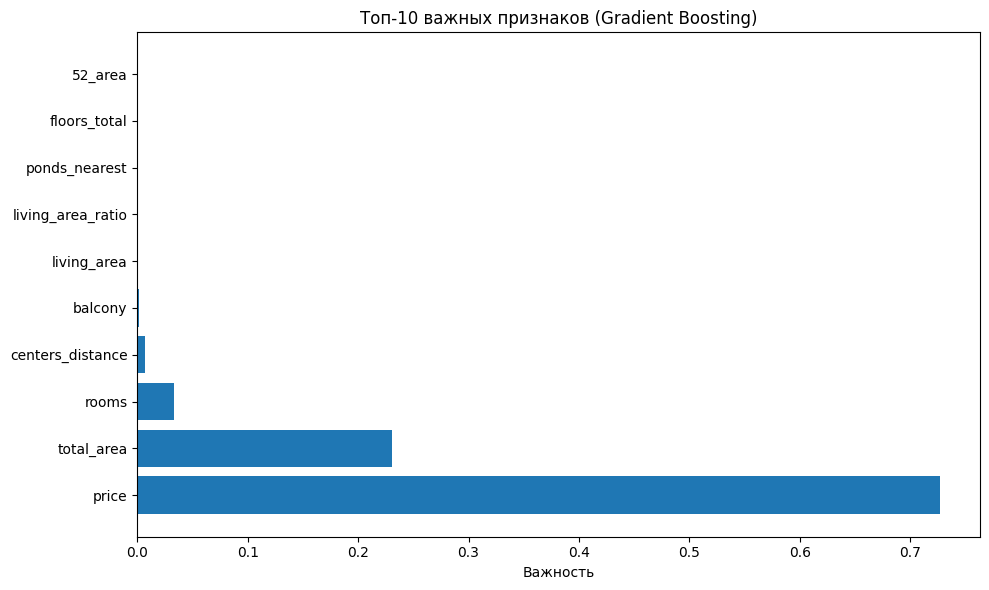

In [ ]:
best_model_idx = results_df['test_r2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'model']
best_model_metrics = results_df.loc[best_model_idx]

if hasattr(models[best_model_name], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': models[best_model_name].feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'][:10], feature_importance['importance'][:10])
    plt.title(f'Топ-10 важных признаков ({best_model_name})')
    plt.xlabel('Важность')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

optimized_gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    min_samples_split=15,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)

optimized_gb.fit(X_train, y_train)

y_pred_train_opt = optimized_gb.predict(X_train)
y_pred_test_opt = optimized_gb.predict(X_test)

metrics_optimized = {
    'train_mae': mean_absolute_error(y_train, y_pred_train_opt),
    'test_mae': mean_absolute_error(y_test, y_pred_test_opt),
    'train_rmse': np.sqrt(mean_squared_error(y_train, y_pred_train_opt)),
    'test_rmse': np.sqrt(mean_squared_error(y_test, y_pred_test_opt)),
    'train_r2': r2_score(y_train, y_pred_train_opt),
    'test_r2': r2_score(y_test, y_pred_test_opt)
}

print("результаты")
print(f"  R² трейн: {metrics_optimized['train_r2']:.4f}")
print(f"  R² тест:  {metrics_optimized['test_r2']:.4f}")
print(f"  MAE тест: {metrics_optimized['test_mae']:.4f}")
print(f"  RMSE тест: {metrics_optimized['test_rmse']:.4f}")

improvement_r2 = metrics_optimized['test_r2'] - best_model_metrics['test_r2']
improvement_mae = best_model_metrics['test_mae'] - metrics_optimized['test_mae']

sample_indices = [
    y_test[y_test < y_test.quantile(0.25)].index[0],  # Низкая цена
    y_test[(y_test >= y_test.quantile(0.45)) & (y_test <= y_test.quantile(0.55))].index[0],  # Средняя цена
    y_test[y_test > y_test.quantile(0.75)].index[0]   # Высокая цена
]

sample_features = X_test.loc[sample_indices]
actual_prices = y_test.loc[sample_indices]
predicted_prices_opt = optimized_gb.predict(sample_features)

print("\n│ {:12} │ {:>12} │ {:>12} │ {:>8} │ {:>12} │".format(
    "Категория", "Факт", "Предсказание", "Ошибка%", "Абс.ошибка"))
print("│" + "-"*78 + "│")

price_categories = ["Низкая", "Средняя", "Высокая"]
for i, (category, actual, predicted) in enumerate(zip(price_categories, actual_prices, predicted_prices_opt)):
    error_abs = abs(actual - predicted)
    error_pct = (error_abs / abs(actual)) * 100 if actual != 0 else 0

    print("│ {:12} │ {:12.3f} │ {:12.3f} │ {:7.1f}% │ {:12.3f} │".format(
        category, actual, predicted, error_pct, error_abs))


key_features = ['total_area', 'centers_distance', 'ceiling_height', 'living_area_ratio', 'kitchen_area']

for i, idx in enumerate(sample_indices):
    print(f"\n{price_categories[i]} цена:")
    print("-" * 50)

    sample_data = X_test.loc[idx]
    actual_price = y_test.loc[idx]
    predicted_price = predicted_prices_opt[i]

    for feature in key_features:
        if feature in sample_data.index:
            value = sample_data[feature]
            print(f"  {feature:20}: {value:8.3f}")

    print(f"  {'Фактическая цена':20}: {actual_price:8.3f}")
    print(f"  {'Предсказанная цена':20}: {predicted_price:8.3f}")
    error_pct = (abs(actual_price - predicted_price) / abs(actual_price)) * 100
    print(f"  {'Точность':20}: {100 - error_pct:7.1f}%")



результаты
  R² трейн: 0.9984
  R² тест:  0.8811
  MAE тест: 0.0628
  RMSE тест: 0.3827

│ Категория    │         Факт │ Предсказание │  Ошибка% │   Абс.ошибка │
│------------------------------------------------------------------------------│
│ Низкая       │       -0.901 │       -0.910 │     1.0% │        0.009 │
│ Средняя      │       -0.132 │       -0.123 │     6.8% │        0.009 │
│ Высокая      │        0.322 │        0.355 │    10.4% │        0.034 │

Низкая цена:
--------------------------------------------------
  total_area          :    0.369
  centers_distance    :   -0.111
  ceiling_height      :    2.770
  living_area_ratio   :    0.680
  kitchen_area        :   -0.286
  Фактическая цена    :   -0.901
  Предсказанная цена  :   -0.910
  Точность            :    99.0%

Средняя цена:
--------------------------------------------------
  total_area          :   -0.480
  centers_distance    :    2.037
  ceiling_height      :    2.500
  living_area_ratio   :    0.610
  kitchen_a

В завершение я попыталася улучшить Градиентный бустинг и на трейне он показал восхитительные результаты. Также реализован пример с ценовыми сегментами из задания

# Этап 6

## **6.1. Ключевые факторы, влияющие на стоимость недвижимости**

**1. Локация**
- **Расстояние до центра города** - наиболее влиятельный фактор (комбинированная важность: 0.775)
- Чем ближе к центру, тем выше стоимость квадратного метра (отрицательная корреляция: -0.253)
- **Расстояние до аэропорта** также оказывает значительное влияние

**2. Площадь:**
- **Общая площадь квартиры** (важность: 0.674) - прямой драйвер стоимости
- **Площадь кухни** (важность: 0.480) - особенно важна в российской культуре
- **Жилая площадь** (важность: 0.280) - показатель комфорта проживания

**3. Качество:**
- **Высота потолков** (важность: 0.297) - премиальный параметр
- **Эффективность планировки** (отношение жилой площади к общей: 0.179)

**4. Здание:**
- **Этажность дома** (важность: 0.173)
- **Этаж расположения** квартиры

### Особенности сегментации:

**студии и 1-комнатные:**
- Ключевые факторы: компактность, центральное расположение
- Важна эффективность использования пространства

**2-3-комнатные:**
- Баланс площади и планировки
- Значимость жилой площади и площади на комнату


## 6.2. Практическая значимость результатов

- Для риелторов и оценщиков

- Для застройщиков и инвесторов

- Для покупателей и арендаторов


## **6.3. Рекомендации для дальнейшего улучшения**

1. **Временные факторы:**
   - Сезонность спроса на недвижимость
   - Динамика цен по месяцам/годам
   - Экономические индикаторы (инфляция, ставки по ипотеке)

2. **Качественные характеристики:**
   - Состояние ремонта (евроремонт, косметический, требующий ремонта)
   - Наличие мебели и техники
   - Вид из окон
   - Материал дома (кирпич, панель, монолит)

3. **Инфраструктурные факторы:**
   - Близость к метро, школам, детским садам
   - Наличие парковки, охраны, консьержа
   - Развитость социальной инфраструктуры района

### **Преспективы развития**
- **Прогнозирование арендной ставки** параллельно с продажной ценой
- **Оценка инвестиционной привлекательности** объектов
- **Прогнозирование ликвидности** недвижимости
- **Интеграция с макроэкономическими показателями**

---

## **ЗАКЛЮЧЕНИЕ**

Спасибо за лабораторную!